#**Look at the Data**



*   x.describe() vor allem für numericals
*   als Begründung für data scaling



In [1]:
import numpy as np
import pandas as pd

seed = 1

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/train.csv'

train = pd.read_csv(file_path, delimiter=';')

<ipython-input-3-8cd4ed603fbf>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(file_path, delimiter=';')


#**Delay (& Earlier Feature)**



**Check for possibly wrong or missing dates:**

In [4]:
NaT_date = pd.to_datetime(train['date'], errors='coerce')
NaT_promised = pd.to_datetime(train['deliverydatepromised'], errors='coerce')
NaT_real = pd.to_datetime(train['deliverydatereal'], errors='coerce')

In [5]:
# Filter rows with invalid date formats (NaT values)
inval_idx_date = train[NaT_date.isnull()].index.tolist()
inval_idx_promised = train[NaT_promised.isnull()].index.tolist()
inval_idx_real = train[NaT_real.isnull()].index.tolist()

# Display incorrect entries of date as string columns
print("Rows of 'date' before conversion:")
print(train.loc[inval_idx_date, 'date'])

print("Rows of 'deliverydatepromised' before conversion:")
print(train.loc[inval_idx_promised, 'deliverydatepromised'])

print("\nRows of 'deliverydatereal' before conversion:")
print(train.loc[inval_idx_real, 'deliverydatereal'])

Rows of 'date' before conversion:
Series([], Name: date, dtype: object)
Rows of 'deliverydatepromised' before conversion:
14955    4746-07-23
15657    4746-11-26
16892    4746-06-13
23111    4746-11-15
23538    4746-05-08
23669    4746-05-15
26727    4746-11-15
27202    4746-10-01
28201    4746-11-18
Name: deliverydatepromised, dtype: object

Rows of 'deliverydatereal' before conversion:
3        0000-00-00
15       0000-00-00
28       0000-00-00
29       0000-00-00
31       0000-00-00
            ...    
32397    0000-00-00
32398    0000-00-00
32406    0000-00-00
32410    0000-00-00
32424    0000-00-00
Name: deliverydatereal, Length: 5472, dtype: object


deliverydatepromised: 8 errors

deliverydatereal: 5472 errors


In [6]:
print(train.loc[inval_idx_promised, 'deliverydatepromised'], train.loc[inval_idx_promised, 'deliverydatereal'])

14955    4746-07-23
15657    4746-11-26
16892    4746-06-13
23111    4746-11-15
23538    4746-05-08
23669    4746-05-15
26727    4746-11-15
27202    4746-10-01
28201    4746-11-18
Name: deliverydatepromised, dtype: object 14955    2008-09-06
15657    2008-12-29
16892    2008-07-18
23111    2008-12-18
23538    0000-00-00
23669    2008-06-17
26727    0000-00-00
27202    2008-11-03
28201    0000-00-00
Name: deliverydatereal, dtype: object


In [7]:
train['deliverydatepromised'] = train['deliverydatepromised'].str.replace('4746', '2008')

**Convert to datetime:**


In [8]:
train['date'] = pd.to_datetime(train['date'])
train['deliverydatepromised'] = pd.to_datetime(train['deliverydatepromised'])
train['deliverydatereal'] = pd.to_datetime(train['deliverydatereal'], errors='coerce')

**Build difference between 'promised' and 'real':**

In [9]:
# Calculate difference between promised and real delivery dates (in days)
train['delivery_diff'] = (train['deliverydatereal'] - train['deliverydatepromised']).dt.days

# Display df with the new feature
print(train[['deliverydatepromised', 'deliverydatereal', 'delivery_diff']].head(10))


  deliverydatepromised deliverydatereal  delivery_diff
0           2008-12-03       2008-12-02           -1.0
1           2008-12-30       2009-02-03           35.0
2           2008-09-02       2008-08-28           -5.0
3           2008-06-17              NaT            NaN
4           2008-08-11       2008-08-08           -3.0
5           2008-08-12       2008-08-11           -1.0
6           2008-12-23       2008-12-22           -1.0
7           2008-09-05       2008-09-04           -1.0
8           2008-06-26       2008-06-27            1.0
9           2008-08-05       2008-08-04           -1.0


In [10]:
# Explore 'delivery_diff'
print(train['delivery_diff'].describe())

count    26956.000000
mean       -17.260276
std         72.324342
min       -369.000000
25%         -3.000000
50%         -1.000000
75%         -1.000000
max        368.000000
Name: delivery_diff, dtype: float64


**Print rows of promised and real for which min() and max() of delivery_diff is true:**

In [11]:
# Asses rows for which delivery_diff min(), max()
min_delivery_diff_row = train[train['delivery_diff'] == train['delivery_diff'].min()]
max_delivery_diff_row = train[train['delivery_diff'] == train['delivery_diff'].max()]

# Display the rows for min and max delivery_diff
print("Rows with the minimum delivery_diff:")
print(min_delivery_diff_row[['date', 'deliverydatepromised', 'deliverydatereal', 'delivery_diff']].head())
print(len(min_delivery_diff_row[['date', 'deliverydatepromised', 'deliverydatereal', 'delivery_diff']]))

print("\nRows with the maximum delivery_diff:")
print(max_delivery_diff_row[['date', 'deliverydatepromised', 'deliverydatereal', 'delivery_diff']].head())
print(len(max_delivery_diff_row[['date', 'deliverydatepromised', 'deliverydatereal', 'delivery_diff']]))


Rows with the minimum delivery_diff:
           date deliverydatepromised deliverydatereal  delivery_diff
1144 2008-04-08           2009-04-13       2008-04-09         -369.0
2023 2008-08-26           2009-08-31       2008-08-27         -369.0
2426 2008-11-25           2009-11-30       2008-11-26         -369.0
3086 2008-05-20           2009-05-25       2008-05-21         -369.0
3260 2008-12-11           2009-12-15       2008-12-11         -369.0
52

Rows with the maximum delivery_diff:
            date deliverydatepromised deliverydatereal  delivery_diff
685   2008-04-02           2008-05-02       2009-05-05          368.0
19923 2008-06-19           2008-06-20       2009-06-23          368.0
2


'deliverydatepromised' seems to be errornous.

**Decision:** Adjust the year of 'promised' according to year of 'date' of the first order.

**Ensure that 'promised' does not fall within the next year, same as correct 'real' date does:**

In [12]:
# Create a new boolean column indicating whether promised and real fall within the first quarter
promised_in_q1 = train['deliverydatepromised'].dt.quarter == 1
real_in_q1 = train['deliverydatereal'].dt.quarter == 1

# Create a new boolean column indicating whether date doesn't fall within the first quarter
date_not_in_q1 = train['date'].dt.quarter != 1

# Filter rows where promised and real fall within the first quarter, but date doesn't
filtered_dates_not_in_q1 = train[promised_in_q1 & real_in_q1 & date_not_in_q1]

# Display the filtered DataFrame
print("Filtered DataFrame where promised and real fall within Q1, but date doesn't:")
print(filtered_dates_not_in_q1[['deliverydatepromised', 'deliverydatereal', 'date']])


Filtered DataFrame where promised and real fall within Q1, but date doesn't:
      deliverydatepromised deliverydatereal       date
23              2009-01-13       2009-01-03 2008-12-30
49              2009-02-16       2009-02-13 2008-11-28
50              2009-01-19       2009-01-16 2008-12-08
213             2009-01-06       2009-01-03 2008-12-22
265             2009-01-13       2009-01-02 2008-12-30
...                    ...              ...        ...
31551           2009-01-01       2009-01-02 2008-12-30
31604           2009-01-12       2009-01-05 2008-12-27
31901           2009-01-06       2009-01-08 2008-12-22
32072           2009-02-13       2009-01-19 2008-12-30
32269           2009-01-09       2009-03-04 2008-12-19

[340 rows x 3 columns]


**Observations for which promised and real fall within the first quarter of next year, but 'date' doesn't.**

Further, filter rows where the year of 'deliverydatepromised' differs from the year of 'deliverydatereal'

In [13]:
filtered_years_diff = filtered_dates_not_in_q1[filtered_dates_not_in_q1['deliverydatepromised'].dt.year != filtered_dates_not_in_q1['deliverydatereal'].dt.year]

# Display filtered df
print("Filtered DataFrame where promised and real fall within Q1, but date doesn't and years differ:")
print(filtered_years_diff[['deliverydatepromised', 'deliverydatereal', 'date']])

Filtered DataFrame where promised and real fall within Q1, but date doesn't and years differ:
      deliverydatepromised deliverydatereal       date
443             2010-01-04       2009-01-17 2008-12-30
1196            2010-01-01       2009-01-03 2008-12-29
3709            2010-01-01       2009-03-27 2008-12-29
5597            2010-01-05       2009-02-25 2008-12-31
8024            2010-01-04       2009-03-13 2008-12-30
12129           2010-01-01       2009-02-13 2008-12-29
19087           2010-01-04       2009-03-07 2008-12-30
21727           2010-01-01       2009-03-07 2008-12-30
21813           2010-01-01       2009-01-08 2008-12-29
22219           2010-01-04       2009-01-15 2008-12-30
22968           2010-01-04       2009-01-24 2008-12-30
25921           2010-01-04       2009-01-02 2008-12-31
28212           2010-01-05       2009-02-09 2008-12-31
28402           2010-01-05       2009-03-16 2008-12-31
29373           2010-01-01       2009-01-02 2008-12-29
29881           2010-01-01

**Note:** However, no adjustment of the year needed, as all entries are delayed anyway and 'delay' will be binary. So we simply adjust the year of promised according to 'date'.

In [14]:
# Adjust the year of the promised date based on the year of the first order
train['adj_deliverydatepromised'] = train.apply(
    lambda row: row['deliverydatepromised'].replace(year=row['date'].year),
    axis=1
)

**Check all three variables:**

In [15]:
print(train[['date', 'deliverydatepromised', 'deliverydatereal']].head())

        date deliverydatepromised deliverydatereal
0 2008-12-01           2008-12-03       2008-12-02
1 2008-12-16           2008-12-30       2009-02-03
2 2008-08-19           2008-09-02       2008-08-28
3 2008-06-16           2008-06-17              NaT
4 2008-08-08           2008-08-11       2008-08-08


**Again, compute difference of 'real' and 'promised' after adjusting the year:**

In [16]:
# Calculate difference between promised and real delivery dates (in days)
train['delivery_diff'] = (train['deliverydatereal'] - train['adj_deliverydatepromised']).dt.days


**Code delay and earlier variable:**

In [113]:
train['delay'] = np.where(train['delivery_diff'] > 0, 1, 0)
train['earlier'] = np.where(train['delivery_diff'] < 0, 1, 0)

#**Delay with levels:**

In [132]:
# Define function to categorize delays into levels
def categorize_delay(delivery_diff):
    if delivery_diff <= 3:
        return 0  # Delay 1-3 days
    elif 4 <= delivery_diff <= 10:
        return 1  # Delay 4-7 days
    else:
        return 2  # More than 10 days

# Apply the function to create delay levels
train['delay_level'] = train['delivery_diff'].apply(categorize_delay)

#**Feature Transformation**


**Stratify:**

Use the stratify parameter in train_test_split to ensure that the split is stratified based on the target variable. This helps maintain the same class distribution in both the training and testing sets.

In [135]:
from sklearn.model_selection import train_test_split

# Split the dataframe into features and labels
y = train['target90']
X = train.drop('target90', axis=1)

# Split into train and test with stratified sampling to preserve class balances
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [40]:
print(train['advertisingdatacode'].isna().sum())

25905


**Before Transformation:**

Numericals:

In [136]:
# Preprocess the features
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_features = ['title', 'newsletter', 'deliverytype', 'invoicepostcode', 'voucher',
                'case', 'gift', 'entry', 'points', 'shippingcosts', 'paymenttype',
                'salutation', 'model', 'delay_level' ] # mit delay_level, delay out
cntnous_features = ['numberitems', 'weight', 'remi', 'cancel', 'used', 'w0',
                    'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8',
                    'w9', 'w10']

preprocess_categorical = Pipeline(steps=[('encoder', OrdinalEncoder())])
preprocess_numerical = Pipeline(steps=[('scaler', MinMaxScaler())])
data_transformer = ColumnTransformer(transformers=[('categorical', preprocess_categorical, cat_features),
                                                   ('numerical', preprocess_numerical, cntnous_features)])
all_features = cat_features + cntnous_features

X_train = pd.DataFrame(data_transformer.fit_transform(X_train), columns=all_features)
X_test = pd.DataFrame(data_transformer.transform(X_test), columns=all_features)

#**About feature transformation:**

OrdinalEncoder(), MinMaxScaler()

This code is part of a feature preprocessing pipeline commonly used in machine learning workflows. Let me break down the code and explain what each part does:

1. **Categorical and Numerical Features Lists:**
    - `cat_features`: This list contains the names of categorical features in your dataset.
    - `cntnous_features`: This list contains the names of continuous (numerical) features in your dataset.

2. **Column Transformer:**
    - `preprocess_categorical`: This pipeline is used for preprocessing categorical features. It applies an `OrdinalEncoder` to encode categorical features numerically. `OrdinalEncoder` transforms categorical features to ordinal integers (0, 1, 2, ...) based on the order of unique values in each column.

    - `preprocess_numerical`: This pipeline is used for preprocessing numerical features. It applies a `MinMaxScaler` to scale numerical features. `MinMaxScaler` scales features to a specified range, typically between 0 and 1.

    - `data_transformer`: The `ColumnTransformer` combines the preprocessing steps for both categorical and numerical features. It specifies which transformer to apply to each type of feature.

3. **Training and Testing Data Transformation:**
    - `X_train`: This DataFrame contains the training features. The `fit_transform` method of the `ColumnTransformer` is used to fit and transform the training data.

    - `X_test`: This DataFrame contains the testing features. The `transform` method is used here to apply the same transformations learned from the training data to the test data.

4. **Concatenation of Features Lists:**
    - `all_features`: This list concatenates both `cat_features` and `cntnous_features`. It represents the complete set of features after preprocessing.

5. **Overall Purpose:**
    - The purpose of this preprocessing pipeline is to ensure that both categorical and numerical features are appropriately transformed before being used as input to a machine learning model. Different types of models often require different preprocessing steps for optimal performance.

    - Scaling numerical features helps when using models that are sensitive to the scale of input features (e.g., Support Vector Machines, k-Nearest Neighbors). Encoding categorical features is necessary because many machine learning models require numerical input.

In summary, this code is preparing your features for machine learning by encoding categorical features and scaling numerical features, creating a processed dataset that can be used to train and test machine learning models.


**MinMaxScaler:**

`MinMaxScaler` is a feature scaling technique used in machine learning. It scales the features to a specified range, typically between 0 and 1. The formula for Min-Max scaling is:

\[ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]

where \(X\) is the original feature value, \(X_{\text{min}}\) is the minimum value of the feature in the dataset, and \(X_{\text{max}}\) is the maximum value of the feature in the dataset.

**Why Use MinMaxScaler:**

1. **Algorithms Sensitive to Scale:**
    - Some machine learning algorithms, such as Support Vector Machines (SVM) and k-Nearest Neighbors (k-NN), are sensitive to the scale of input features. If features are on different scales, these algorithms might give more importance to features with larger magnitudes.

2. **Gradient Descent-Based Methods:**
    - Algorithms that use gradient descent for optimization, like neural networks, can converge faster when features are scaled. This is because the learning rate in gradient descent is applied to each feature, and having features on similar scales helps the algorithm converge more smoothly.

3. **Consistent Interpretation:**
    - Scaling ensures that all features contribute equally to the model. It provides a consistent interpretation of the model coefficients or feature importances.

**Random Forest and Gradient Boosting:**

Random Forest and Gradient Boosting (like XGBoost or LightGBM) are ensemble learning methods that build multiple decision trees and combine their predictions. These algorithms, in general, are less sensitive to the scale of features. Here's why:

1. **Decision Trees:**
    - Decision trees split nodes based on feature thresholds, and the split decisions are not influenced by the scale of the features. Therefore, decision trees themselves are inherently not sensitive to feature scaling.

2. **Ensemble of Trees:**
    - In the case of Random Forest or Gradient Boosting, the ensemble nature of these algorithms further diminishes the impact of feature scaling. Each tree is built independently, and the final prediction is an aggregation of individual tree predictions.

**Advantages of Scaling in Random Forest/Gradient Boosting:**

While Random Forest and Gradient Boosting are not as sensitive to feature scale as some other algorithms, scaling can still have some advantages:

1. **Consistent Interpretation:**
    - As mentioned earlier, even though these ensemble methods are not heavily impacted by feature scale, having consistent scales across features can make the interpretation of feature importances more straightforward.

2. **Consistent Cross-Validation:**
    - In a cross-validation setting, where different subsets of the data are used for training and testing, consistent feature scaling can ensure that the model performs consistently across folds.

**Connection to Interpretability Methods:**

- **Partial Dependence Plots (PDP) and Shapley Values:**
    - PDP and Shapley values are interpretation techniques that aim to explain the relationship between individual features and the model's predictions. While these methods are not directly influenced by feature scaling, having consistent scales can make it easier to compare the impact of different features on the model predictions.

In summary, while Random Forest and Gradient Boosting are not as sensitive to feature scaling as some other algorithms, scaling features can still provide some benefits in terms of consistent interpretation and performance across different scenarios, including when using interpretability methods like PDP or Shapley values.



**After Transformation:**

Numericals:

In [35]:
print(X_train[cntnous_features].head())

   numberitems    weight  remi    cancel  used        w0   w1   w2   w3   w4  \
0     0.034483  0.000195   0.0  0.000000   0.0  0.020202  0.0  0.0  0.0  0.0   
1     0.000000  0.000098   0.0  0.058824   0.0  0.000000  0.0  0.0  0.0  0.0   
2     0.000000  0.048564   0.0  0.000000   0.0  0.020202  0.0  0.0  0.0  0.0   
3     0.000000  0.000195   0.0  0.000000   0.0  0.000000  0.0  0.0  0.0  0.0   
4     0.000000  0.019347   0.0  0.000000   0.0  0.000000  0.0  0.0  0.0  0.0   

    w5   w6   w7   w8   w9   w10  
0  0.0  0.0  0.0  0.0  0.0  0.00  
1  0.0  0.0  0.0  0.0  0.0  0.00  
2  0.0  0.0  0.0  0.0  0.0  0.00  
3  0.0  0.0  0.0  0.0  0.0  0.02  
4  0.0  0.0  0.0  0.0  0.0  0.02  


#**Data Exploration**

Relation and Countplots...



**Combine y_train and X_train to combined_train for plotting:**

In [119]:
combined_train = pd.concat([X_train, y_train], axis=1)

###**Countplots**

**Class distribution:**

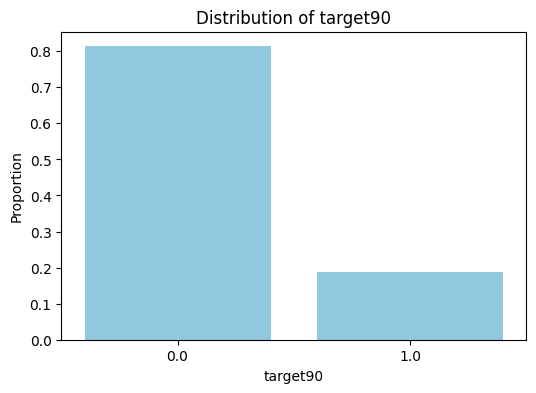

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Count the occurrences of target category
counts = combined_train['target90'].value_counts(normalize=True).reset_index(name='count')

# Plot the count plot
sns.barplot(x='index', y='count', data=counts, color='skyblue')

plt.title(f"Distribution of target90")
plt.xlabel('target90')
plt.ylabel('Proportion')
plt.show()


Indicates we have highly imbalanced class distribution in the dataset.

Need for adressing this Imbalance.

**Plot categoricals:**



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



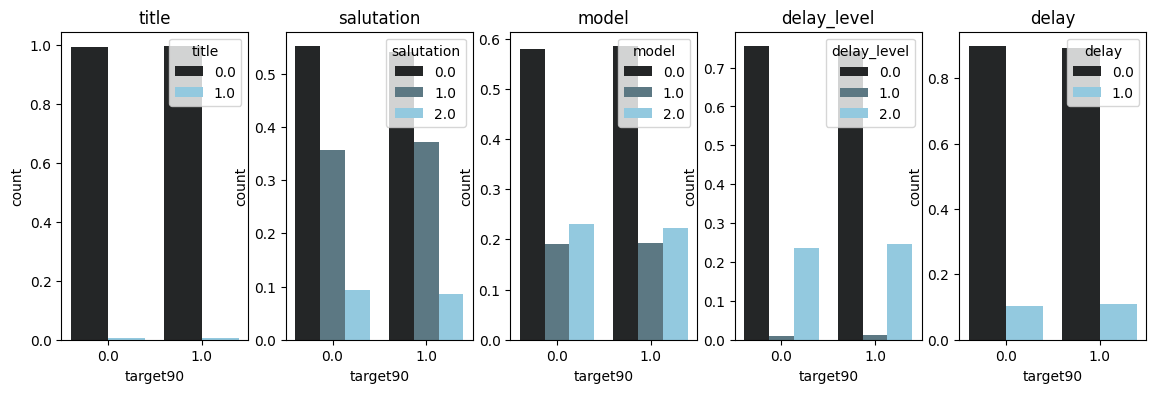

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

cols1 = ['title', 'salutation', 'model', 'delay_level', 'delay']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols1):
    ax = plt.subplot(1, len(cols1), i + 1)

    # Count the occurrences of each combination of 'target90' and the current column
    counts = combined_train.groupby(['target90', col]).size().reset_index(name='count')

    # Normalize the counts for each hue category
    counts['count'] /= counts.groupby('target90')['count'].transform('sum')

    # Plot the normalized count plot
    sns.barplot(x='target90', y='count', hue=col, data=counts, color='skyblue')

    ax.set_title(f"{col}")

plt.show()





Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



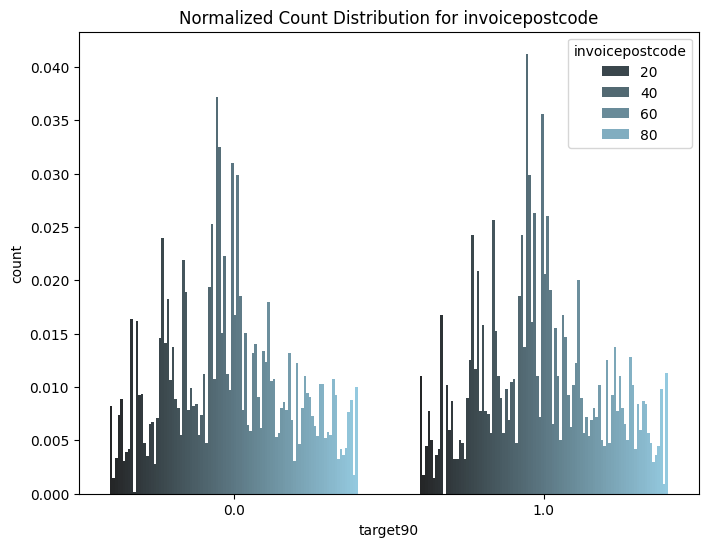

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = 'invoicepostcode'

counts = combined_train.groupby(['target90', col]).size().reset_index(name='count')

# Normalize the counts for each 'target90' category
counts['count'] /= counts.groupby('target90')['count'].transform('sum')

# Plot the normalized count plot
plt.figure(figsize=(8, 6))
sns.barplot(x='target90', y='count', hue=col, data=counts, color='skyblue')
plt.title(f"Normalized Count Distribution for {col}")
plt.show()


Wie kann man hier den Unterschied deutlicher plotten oder zeigen?



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



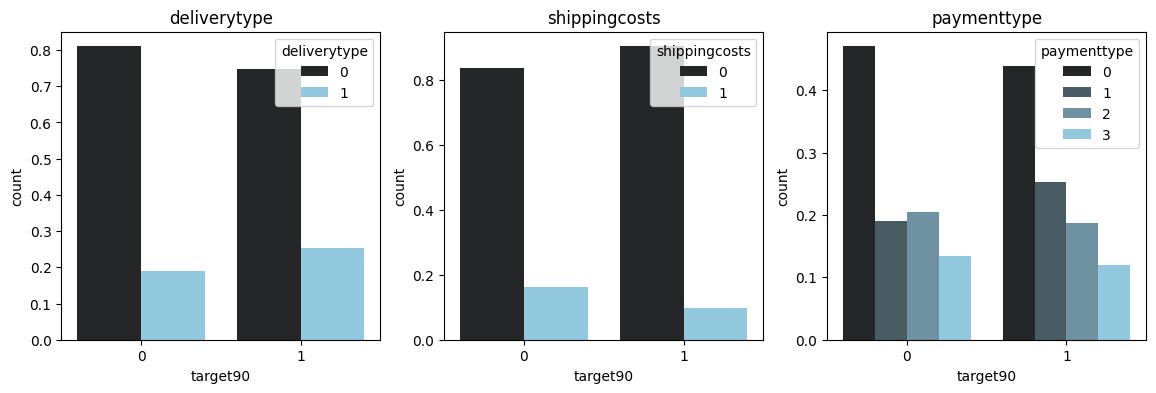

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols2 = ['deliverytype', 'shippingcosts', 'paymenttype']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols2):
    ax = plt.subplot(1, len(cols2), i + 1)

    # Count the occurrences of each combination of 'target90' and the current column
    counts = train.groupby(['target90', col]).size().reset_index(name='count')

    # Normalize the counts for each hue category
    counts['count'] /= counts.groupby('target90')['count'].transform('sum')

    # Plot the normalized count plot
    sns.barplot(x='target90', y='count', hue=col, data=counts, color='skyblue')

    ax.set_title(f"{col}")

plt.show()





Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



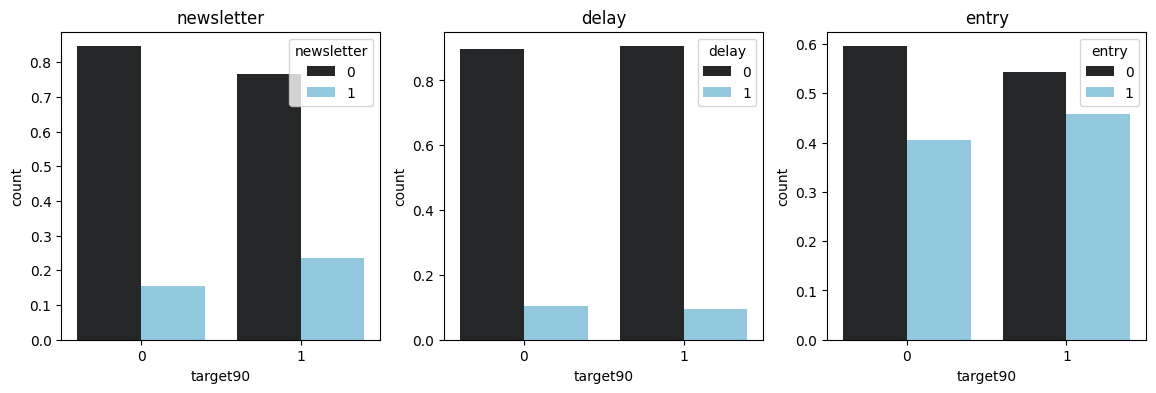

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols3 = ['newsletter', 'delay', 'entry']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols3):
    ax = plt.subplot(1, len(cols3), i + 1)

    # Count the occurrences of each combination of 'target90' and the current column
    counts = train.groupby(['target90', col]).size().reset_index(name='count')

    # Normalize the counts for each hue category
    counts['count'] /= counts.groupby('target90')['count'].transform('sum')

    # Plot the normalized count plot
    sns.barplot(x='target90', y='count', hue=col, data=counts, color='skyblue')

    ax.set_title(f"{col}")

plt.show()





Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.



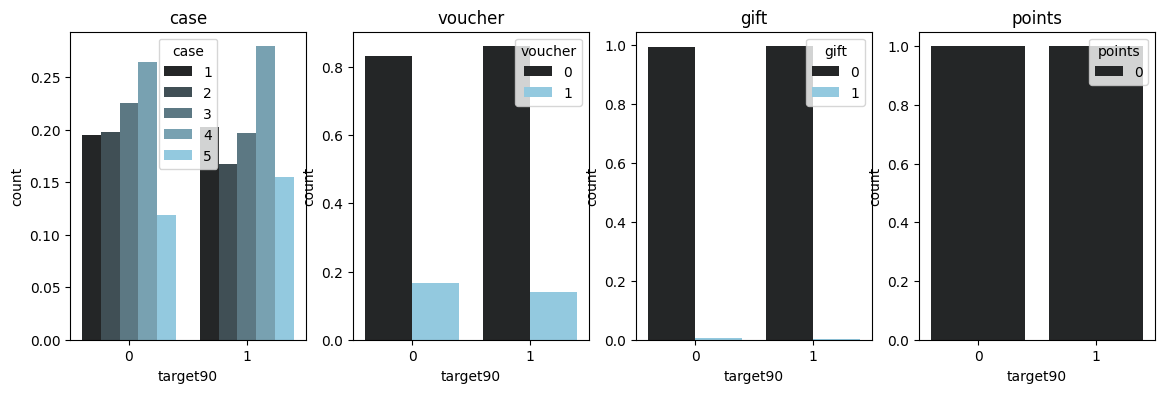

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols4 = ['case', 'voucher', 'gift', 'points']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols4):
    ax = plt.subplot(1, len(cols4), i + 1)

    # Count the occurrences of each combination of 'target90' and the current column
    counts = train.groupby(['target90', col]).size().reset_index(name='count')

    # Normalize the counts for each hue category
    counts['count'] /= counts.groupby('target90')['count'].transform('sum')
    # Plot the normalized count plot
    sns.barplot(x='target90', y='count', hue=col, data=counts, color='skyblue')

    ax.set_title(f"{col}")

plt.show()



###**Boxplots**

**Plotting continuous:**

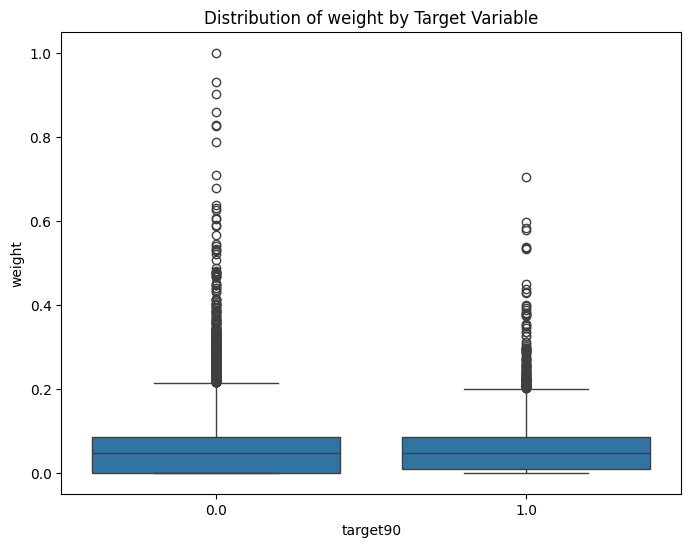

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variable to plot
cont_vars = 'weight'

# Plot a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target90', y=cont_vars, data=combined_train) # better use combined_train bc norm. data, plot better to interprete
plt.title(f"Distribution of {cont_vars} by Target Variable")
plt.show()


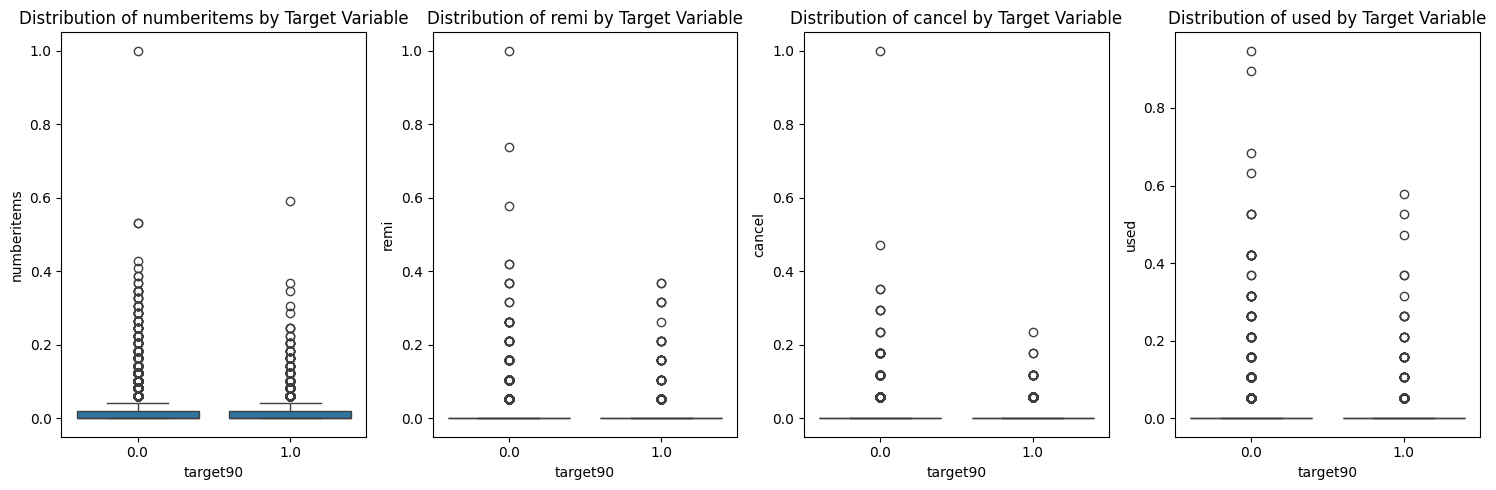

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Continous variables to plot
cont_vars = ['numberitems', 'remi', 'cancel', 'used']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cont_vars), figsize=(15, 5))

# Plot boxplots for each categorical variable
for i, var in enumerate(cont_vars):
    sns.boxplot(x='target90', y=var, data=combined_train, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} by Target Variable")

plt.tight_layout()
plt.show()


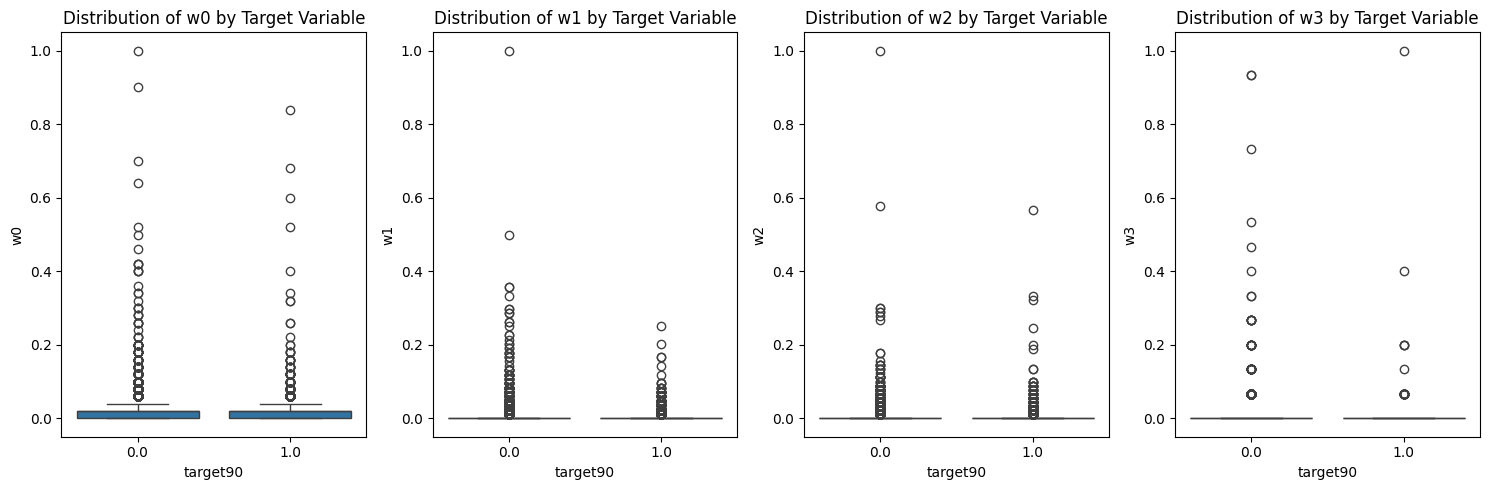

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Continous variables to plot
cont_vars = ['w0', 'w1', 'w2', 'w3']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cont_vars), figsize=(15, 5))

# Plot boxplots for each continous variable
for i, var in enumerate(cont_vars):
    sns.boxplot(x='target90', y=var, data=combined_train, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} by Target Variable")

plt.tight_layout()
plt.show()


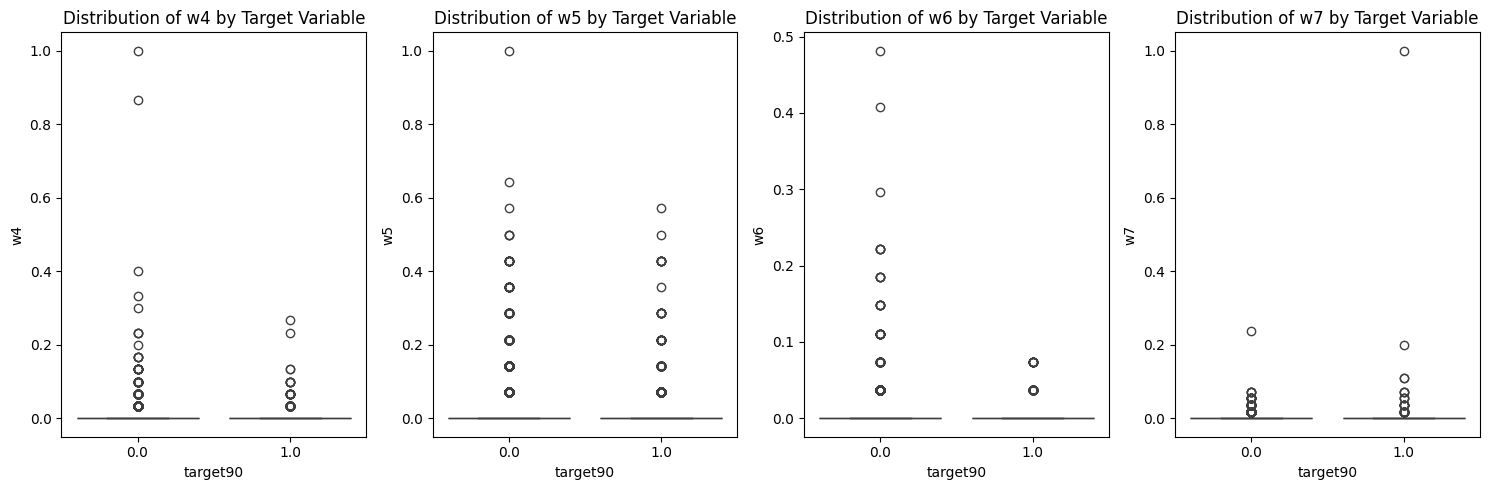

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous variables to plot
cont_vars = ['w4', 'w5', 'w6', 'w7']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cont_vars), figsize=(15, 5))

# Plot boxplots for each categorical variable
for i, var in enumerate(cont_vars):
    sns.boxplot(x='target90', y=var, data=combined_train, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} by Target Variable")

plt.tight_layout()
plt.show()


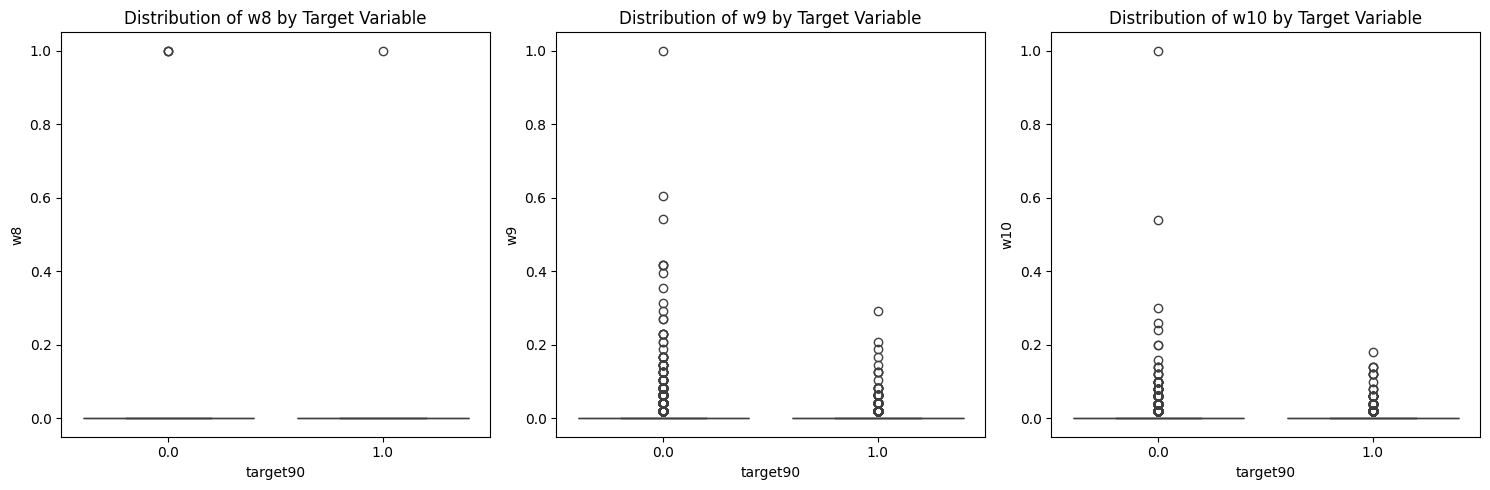

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Continuous variables to plot
cont_vars = ['w8', 'w9', 'w10']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(cont_vars), figsize=(15, 5))

# Plot boxplots for each categorical variable
for i, var in enumerate(cont_vars):
    sns.boxplot(x='target90', y=var, data=combined_train, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} by Target Variable")

plt.tight_layout()
plt.show()


###**Model evaluation functions:**

In [24]:
# Adjusted function, more flexible:
import numpy as np
import pandas as pd

def evaluate_model(y_true, y_pred):
    # Convert to NumPy arrays if input is a pandas Series
    if isinstance(y_true, pd.Series):
        y_true = y_true.values

    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

    # Convert to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    # Calculate F1-score
    f1_score = 2*TP / (2*TP + FP + FN)


    # Compare to distribution of the target variable in test set:
    print('Ground truth in test set: \n')
    print('Number of purchases after initial purchase:', y_true.sum())
    # Share:
    print('Share:', y_true.mean())
    print('Number of those who did not purchase again:', len(y_true) - y_true.sum(),'\n')

    # Print results
    print('Model performance: \n')
    print("Accuracy:", accuracy)
    print("Precision (Share of positives correctly specified among all predicted positives):", precision)
    print("Sensitivity (Share of actual true positive values found):", sensitivity)
    print("Specificity (Share of actual true negative values found):", specificity)
    print("F1-score (Harmonic mean of precision and sensitivity)", f1_score)
    print(f"TP: {TP}", f"FP: {FP}", f"TN: {TN}", f"FN: {FN}")
    return TP, TN, FP, FN


**Expected revenue comparison all versus targeted:**

In [110]:
def expected_revenue(y_true, tn, fn):
  total_customers = len(y_true)
  # Sum of positive class (repeating buyers):
  rep_buyers = y_true.sum()

  non_buyers = total_customers - rep_buyers

  expected_revenue_all = non_buyers * 1.5 - rep_buyers * 5 # revenue gain - loss
  print(f"Expected revenue if all customers were sent a voucher: €{expected_revenue_all}")

  rev_gain = tn * 1.5
  rev_loss = fn * 5
  expected_revenue_targeted = rev_gain - rev_loss
  print(f"Expected Revenue according to model: €{expected_revenue_targeted}")

  # Gain in percentage
  revenue_gain_percentage = ((expected_revenue_targeted - expected_revenue_all) / expected_revenue_all) * 100
  print(f"Expected Revenue Gain Percentage: {revenue_gain_percentage:.2f}%")




**Expected Revenue of test-set assuming everyone were sent a voucher:**

In [25]:
def all_voucher_expected_revenue(y_true):
  total_customers = len(y_true)
  # Sum of positive class (repeating buyers):
  rep_buyers = y_true.sum()

  non_buyers = total_customers - rep_buyers

  expected_revenue = non_buyers * 1.5 - rep_buyers * 5 # revenue gain - loss
  print(f"Expected revenue if all customers were sent a voucher: €{expected_revenue}")



**Expected Revenue according to Model Performance:**

In [26]:
def model_expected_revenue(tn, fn):
  rev_gain = tn * 1.5
  rev_loss = fn * 5
  expected_revenue = rev_gain - rev_loss
  print(f"Expected Revenue according to model: €{expected_revenue}")

**Load relevant packages for classification task**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Different Param Search approaches (see lecture slides):
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Some performance measures of sklearn:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#**Random Forest Classifier**

In [68]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestClassifier()

param_dist_fr = {
    'n_estimators': range(10, 200),  # org. randin(), NOTE: wider range bc RandSearch?
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': range(2, 20),  # org. randint()
    'min_samples_leaf': range(1, 20),   # org. randint()
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

randSearch_fr = RandomizedSearchCV(forest, param_distributions=param_dist_fr, n_iter=10, cv=5, random_state=seed)
randSearch_fr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 20),
                                        'n_estimators': range(10, 200)},
                   random_state=1)

In [69]:
randSearch_fr.best_score_

0.813453397995889

In [70]:
randSearch_fr.best_params_

{'n_estimators': 19,
 'min_samples_split': 19,
 'min_samples_leaf': 15,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': False}

**Predictions with best params:**

In [76]:
forest = randSearch_fr.best_estimator_

# Fit the model on the training data
forest.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test data
y_pred_fr = forest.predict(X_test)

# Evaluate the model
acc_fr = accuracy_score(y_test, y_pred_fr)
print(f"Accuracy: {acc_fr}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.7775996052793882


In [77]:
# Expected revenue all
print(all_voucher_expected_revenue(y_test))

TP, TN, FP, FN = evaluate_model(y_test, y_pred_fr)

# Expected revenue model according to the model
print(model_expected_revenue(TN, FN))

Expected revenue if all customers were sent a voucher: €2326.0
None
Ground truth in test set: 

Number of purchases after initial purchase: 1513
Share: 0.18662883927470086
Number of those who did not purchase again: 6594 

Model performance: 

Accuracy: 0.7775996052793882
Precision (Share of positives correctly specified among all predicted positives): 0.31875
Sensitivity (Share of actual true positive values found): 0.16853932584269662
Specificity (Share of actual true negative values found): 0.9173491052471944
F1-score (Harmonic mean of precision and sensitivity) 0.2204928664072633
TP: 255 FP: 545 TN: 6049 FN: 1258
Expected Revenue according to model: €2783.5
None


#**Gradient Boosting Classifier**

###**RandomizedSearch()**

###**Account for imbalanced class distribution**

In [125]:
# Calculate inverse class frequencies for sample weights
class_counts = dict(zip(*np.unique(y_train, return_counts=True)))
total_samples = len(y_train)
weight_for_minority_class = total_samples / (2 * class_counts[1])  # 1 is the minority class
# Create sample weights for each instance
sample_weights = [weight_for_minority_class if label == 1 else 1 for label in y_train]


###**First round RandomizedSearch**

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform


gb = GradientBoostingClassifier()

# Define parameter grid for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': range(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'subsample': uniform(0.5, 1.0)
}

# Create RandomizedSearchCV instance
# verbose = n: how many process messages are printed to console
randSearch_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, n_iter=10, cv=5,
                                   verbose=0, random_state=seed)

# Fit the RandomizedSearchCV
randSearch_gb.fit(X_train, y_train)



30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a3748ea500>,
                                        'max_depth': range(3, 10),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(2, 20),
                                        'n_estimators': range(50, 200),
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a3748e9e10>},
                   random_state=1)

In [127]:
randSearch_gb.best_score_

0.8091773442148537

In [128]:
randSearch_gb.best_params_

{'learning_rate': 0.14436805785277154,
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 176,
 'subsample': 0.7877753385863487}

#**Model Predictions (Revenue Maximization):**

**Considerations:**

*   adressing imbalanced classes while training

*   transformed and new features

*   best params first round cv-search




In [129]:
gb = randSearch_gb.best_estimator_

gb.fit(X_train, y_train, sample_weight=sample_weights) # Here, for training adj weights!

# Make predictions on the test data
y_pred_gb = gb.predict(X_test)

# Evaluate the model
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {acc_gb}")

Accuracy: 0.7578635746885408


**Expected revenue all versus Expected revenue Model Performance:**

In [82]:
# Expected revenue all
print(all_voucher_expected_revenue(y_test))

TP, TN, FP, FN = evaluate_model(y_test, y_pred_gb)

# Expected revenue model according to the model
print(model_expected_revenue(TN, FN))

Expected revenue if all customers were sent a voucher: €2326.0
None
Ground truth in test set: 

Number of purchases after initial purchase: 1513
Share: 0.18662883927470086
Number of those who did not purchase again: 6594 

Model performance: 

Accuracy: 0.7639077340569878
Precision (Share of positives correctly specified among all predicted positives): 0.31067044381491976
Sensitivity (Share of actual true positive values found): 0.21744877726371448
Specificity (Share of actual true negative values found): 0.8892932969366091
F1-score (Harmonic mean of precision and sensitivity) 0.2558320373250389
TP: 329 FP: 730 TN: 5864 FN: 1184
Expected Revenue according to model: €2876.0
None


In [130]:
tp, tn, fp, fn = evaluate_model(y_test, y_pred_gb)

expected_revenue(y_test, tn, fn)

Ground truth in test set: 

Number of purchases after initial purchase: 1513
Share: 0.18662883927470086
Number of those who did not purchase again: 6594 

Model performance: 

Accuracy: 0.7578635746885408
Precision (Share of positives correctly specified among all predicted positives): 0.3026315789473684
Sensitivity (Share of actual true positive values found): 0.2280237937871778
Specificity (Share of actual true negative values found): 0.8794358507734303
F1-score (Harmonic mean of precision and sensitivity) 0.2600829249905767
TP: 345 FP: 795 TN: 5799 FN: 1168
Expected revenue if all customers were sent a voucher: €2326.0
Expected Revenue according to model: €2858.5
Expected Revenue Gain Percentage: 22.89%


In [ ]:
# Access feature importances
feature_importances_gb = gb.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances_gb):
    print(f"{feature}: {importance}")

feature_importance_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_gb})

# Sort in descending order
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)
print(feature_importance_gb)
print(len(feature_importance_gb))
print(feature_importance_gb.head(15))

title: 0.00154906383308846
newsletter: 0.05585415969022301
deliverytype: 0.03867383937527664
invoicepostcode: 0.1511984923341873
voucher: 0.024950568435111904
case: 0.04045809544423872
gift: 0.0014249419584884456
entry: 0.01892265695888829
points: 0.0
shippingcosts: 0.030308223394160082
paymenttype: 0.03019348360244649
salutation: 0.037606555161885956
delay: 0.009378021794652053
numberitems: 0.04282165344252594
weight: 0.2440288474567358
remi: 0.05885612368653595
cancel: 0.01670186405523339
used: 0.019724818856758884
w0: 0.033391069236342705
w1: 0.031507296331424225
w2: 0.029070216589151533
w3: 0.011687672457213411
w4: 0.00962922208015921
w5: 0.014016833990689799
w6: 0.005442634569173765
w7: 0.007164370797227814
w8: 0.00035028679604476797
w9: 0.022782553237830728
w10: 0.012306434434304512
            Feature  Importance
14           weight    0.244029
3   invoicepostcode    0.151198
15             remi    0.058856
1        newsletter    0.055854
13      numberitems    0.042822
5       

#**Was ist eigentlich mit 'MODEL' Variable ??**

<BarContainer object of 29 artists>

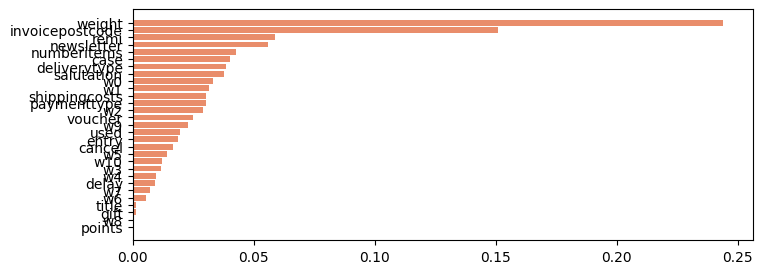

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Each GradientBoost ensemble has its own feature importances
scores = randSearch_gb.best_estimator_.feature_importances_  # look at feature imp. of best estimator ensemble
features = X_train.columns.to_numpy()
srtd = np.argsort(scores)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.barh(y=features[srtd], width=scores[srtd])

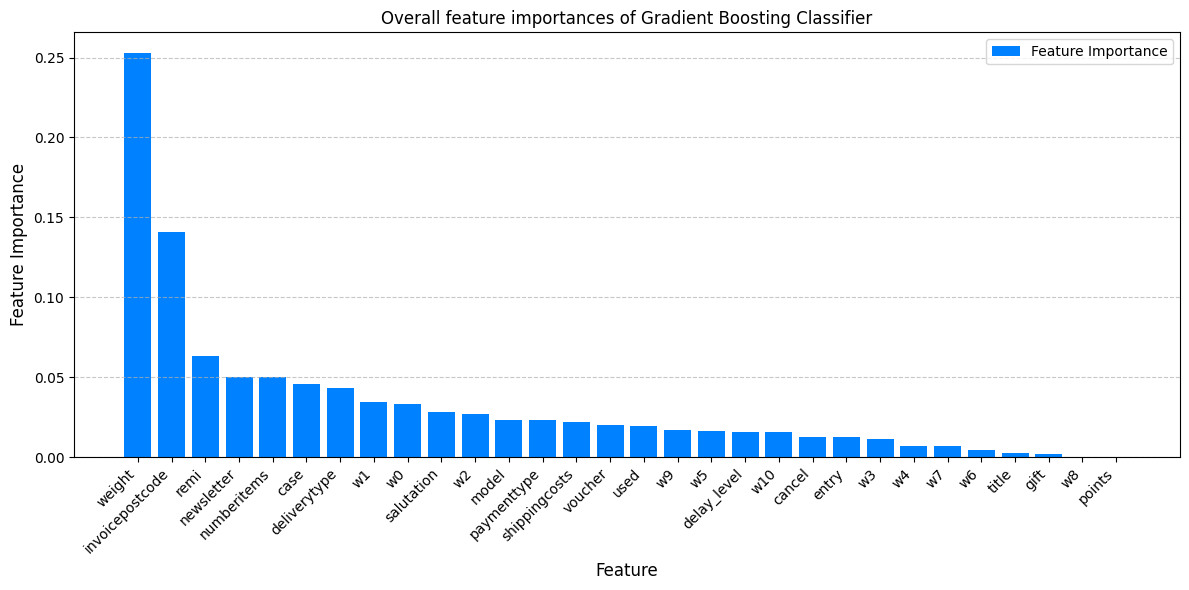

In [131]:
# Sort feature importances in descending order
sorted_indices = np.argsort(gb.feature_importances_)[::-1]
srtd = gb.feature_importances_[sorted_indices]

# Plot feature importance
fig = plt.figure(figsize=(12, 6))
ax = fig.gca() #get current axis
ax.bar(range(X_train.shape[1]), srtd, color = "#0081ff", width = 0.8)
ax.set_xticks(np.arange(X_train.shape[1]))
ax.set_xticklabels([f'{X_train.columns[col]}' for col in sorted_indices], rotation=45, ha='right')
ax.set_xlabel('Feature', fontsize = 12)
ax.set_ylabel('Feature Importance', fontsize = 12)
ax.set_title('Overall feature importances of Gradient Boosting Classifier')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(['Feature Importance'])
plt.tight_layout()
# plt.savefig('feature_importance.png', dpi=300)

###**Global methods:**

**Permutation Feature Importance**

In [89]:
gb = randSearch_gb.best_estimator_
from sklearn.inspection import permutation_importance
metrics = ['accuracy', 'precision', 'recall', 'f1']
pfi_scores = {}
for metric in metrics:
    print('Computing permutation importance with {0}...'.format(metric))
    pfi_scores[metric] = permutation_importance(gb, X_test, y_test, scoring=metric, n_repeats=30, random_state=seed)

Computing permutation importance with accuracy...
Computing permutation importance with precision...
Computing permutation importance with recall...
Computing permutation importance with f1...


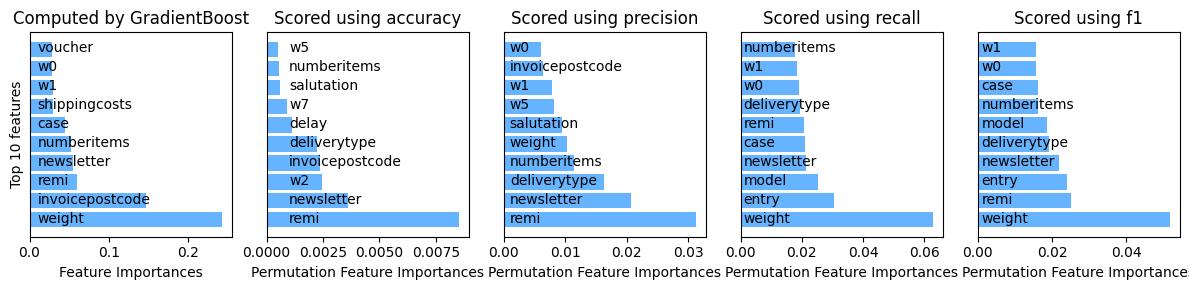

In [92]:
features = X_test.columns.values
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))

scores = gb.feature_importances_
features = X_test.columns.to_numpy()
srtd = np.argsort(-scores)

top = 10
ax[0].barh(y=np.arange(0, top), width=scores[srtd[:top]], color='#0081ff', alpha=0.6)
for i in range(top):
    ax[0].text(0.01, i-0.15, features[srtd[i]])
ax[0].set_yticks([])
ax[0].set_ylabel('Top {0} features'.format(top));
ax[0].set_xlabel('Feature Importances')
ax[0].set_title('Computed by GradientBoost')

for k, metric in enumerate(metrics):
    scores = pfi_scores[metric]['importances_mean']
    srtd = np.argsort(-scores)

    ax[k+1].barh(y=np.arange(0, top), width=scores[srtd[:top]], color='#0081ff', alpha=0.6)
    for i in range(top):
        ax[k+1].text(0.001, i-0.15, features[srtd[i]])
    ax[k+1].set_yticks([])
    ax[k+1].set_xlabel('Permutation Feature Importances')
    ax[k+1].set_title('Scored using {0}'.format(metric))


plt.tight_layout()

**Partial Dependence Plots**

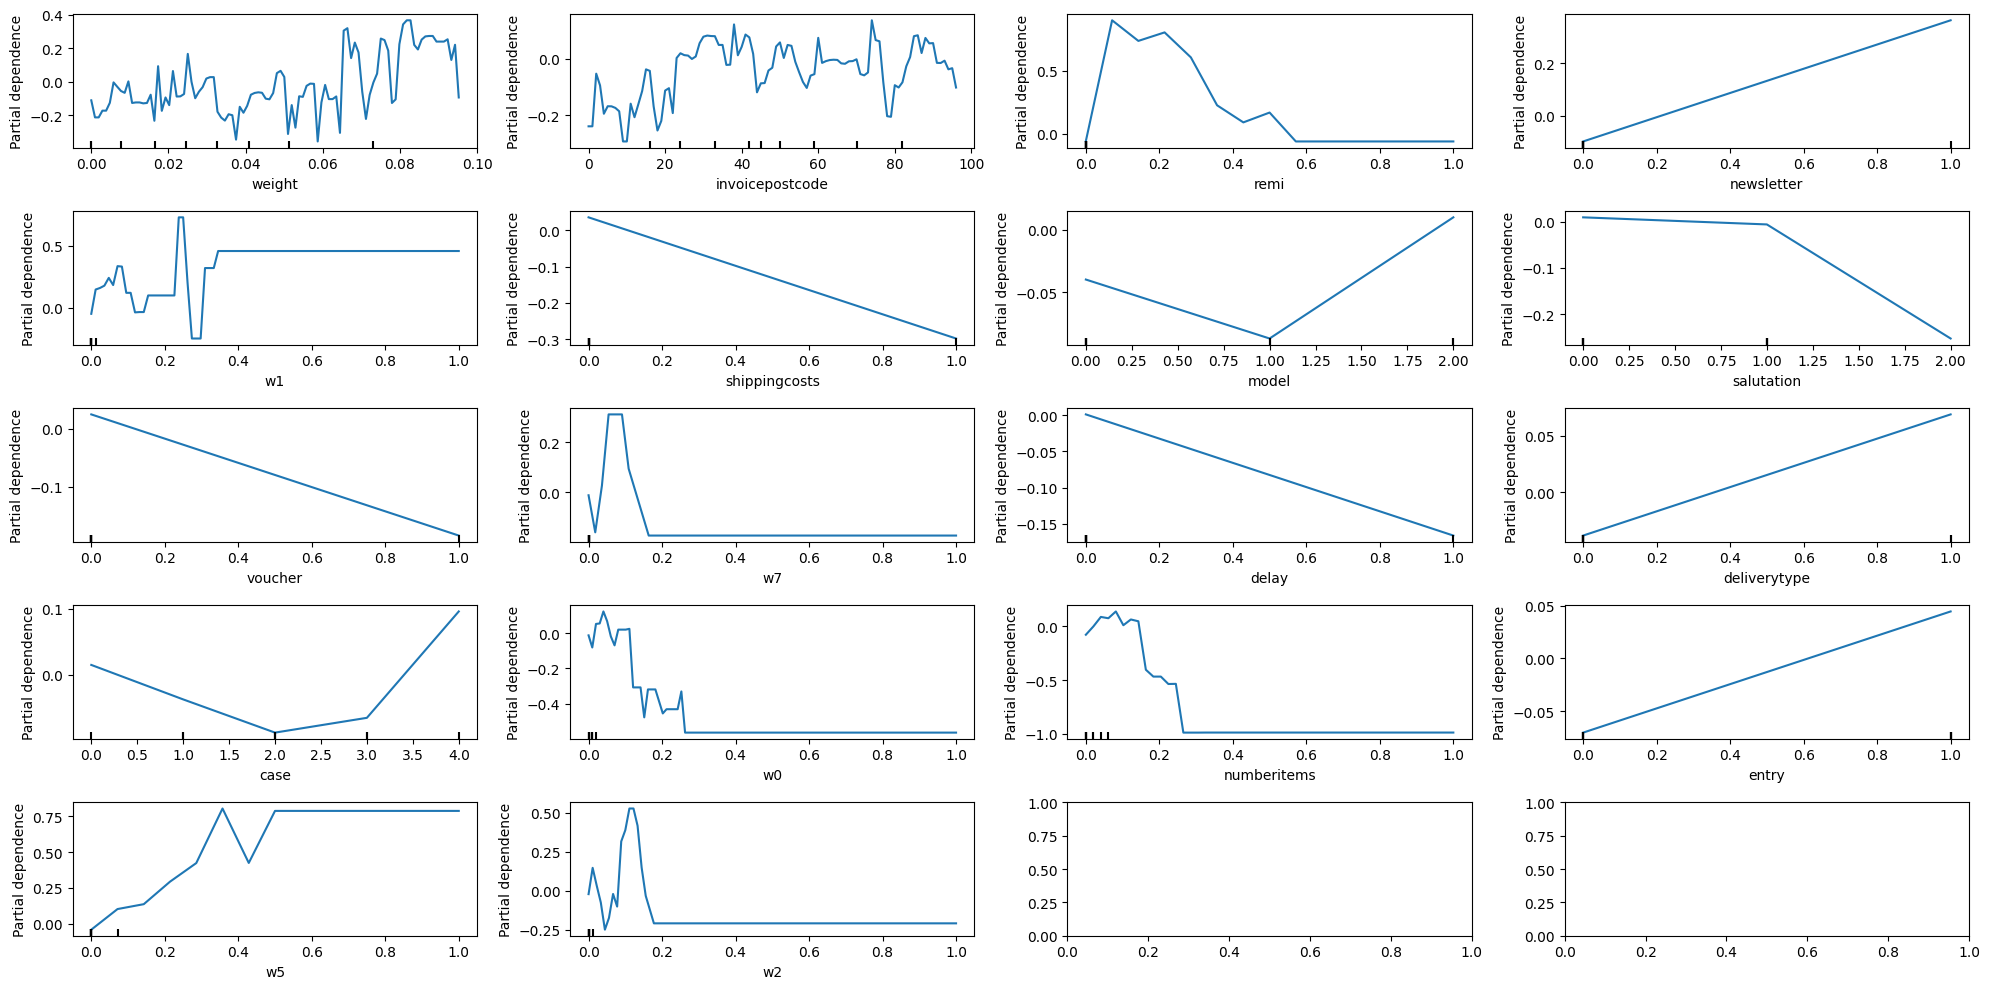

In [96]:
from sklearn.inspection import PartialDependenceDisplay as pdp
import matplotlib.pyplot as plt

features_to_plot = ['weight', 'invoicepostcode', 'remi', 'newsletter', 'w1', 'shippingcosts',
                    'model', 'salutation', 'voucher', 'w7',
                    'delay', 'deliverytype', 'case', 'w0', 'numberitems', 'entry', 'w5', 'w2']

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 10))

# Iterate through both features and axes
for feature, axis in zip(features_to_plot, ax.flatten()):
    pdp.from_estimator(gb, X_train,
                       features=[feature],  # Use only one feature at a time
                       feature_names=list(X_train.columns),
                       kind='average', response_method='decision_function',
                       ax=axis)

    # Set the title for each subplot
    #axis.set_title(feature)

plt.tight_layout()
plt.show()


**PDP Interpretaition:**

The y-axis of partial dependence plots (PDPs) does not represent the actual predicted class labels (e.g., 0 or 1 for binary classification) but rather the change in the predicted probability of the positive class (class 1 in your case). The y-axis values are relative to the baseline probability, and they indicate how the predicted probability of the positive class changes as the selected feature varies.

In a binary classification scenario where you are predicting whether a customer buys again (1) or not (0), the y-axis of the PDP will typically represent the change in the predicted probability of the positive class (buying again). The values on the y-axis are deviations from the baseline probability, not the absolute probabilities themselves.

Here's how you can interpret the y-axis:

1. **Positive Values:**
   - If the y-axis value is positive, it indicates an increase in the predicted probability of the positive class (buying again) compared to the baseline probability.

2. **Negative Values:**
   - If the y-axis value is negative, it indicates a decrease in the predicted probability of the positive class compared to the baseline probability.

3. **Magnitude of Change:**
   - The magnitude of the change on the y-axis represents the strength of the effect of the selected feature on the predicted probability. A larger positive value (or more negative for a negative value) indicates a more significant impact.

4. **Baseline Probability:**
   - The baseline probability is the predicted probability of the positive class when all features are set to their average or most common values. The PDP shows how the probability changes as you vary the selected feature while keeping other features constant.

Here's an example interpretation:

- If the PDP for a specific feature shows a positive peak at a certain value, it means that when that feature is set to that particular value, the model predicts a higher probability of the customer buying again compared to the baseline probability.

Remember, the actual threshold for classifying predictions into 0 or 1 depends on your chosen threshold (commonly 0.5) and might not be directly visible on the PDP. The PDPs are useful for understanding the relationship between individual features and the model's predicted probabilities. If you need to interpret the PDP in terms of class labels, you may need to choose a threshold and examine how the predicted probabilities relate to that threshold.

**NOTE:** Macht binary plots von denen wie deliverytype, newsletter etc überhaupt Sinn so zu plotten?

**Global Surrogate Model**

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score

yb_trn_pred = gb.predict(X_train)  # Training set predictions of the black-box (GB) model
yb_tst_pred = gb.predict(X_test)  # Test set predictions of the black-box (GB) model

acc={}

leaf_limits = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
for max_leaf_nodes in leaf_limits:
    print('Surrogate max-leaf-nodes = {0}'.format(max_leaf_nodes))
    surrogate = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion='gini',
                                       min_samples_leaf=20, class_weight={0: 1, 1: 10})
    surrogate.fit(X_train, yb_trn_pred)
    ys_trn_pred = surrogate.predict(X_train)
    ys_tst_pred = surrogate.predict(X_test)

    acc[max_leaf_nodes] = {'trn': {'black-box': accuracy_score(y_train, yb_trn_pred),
                                   'surrogate': accuracy_score(y_train, ys_trn_pred),
                                   'r2': r2_score(yb_trn_pred, ys_trn_pred)},
                           'tst': {'black-box': accuracy_score(y_test, yb_tst_pred),
                                   'surrogate': accuracy_score(y_test, ys_tst_pred),
                                   'r2': r2_score(yb_tst_pred, ys_tst_pred)}}

Surrogate max-leaf-nodes = 2
Surrogate max-leaf-nodes = 4
Surrogate max-leaf-nodes = 6
Surrogate max-leaf-nodes = 8
Surrogate max-leaf-nodes = 10
Surrogate max-leaf-nodes = 12
Surrogate max-leaf-nodes = 14
Surrogate max-leaf-nodes = 16
Surrogate max-leaf-nodes = 18
Surrogate max-leaf-nodes = 20
Surrogate max-leaf-nodes = 22
Surrogate max-leaf-nodes = 24
Surrogate max-leaf-nodes = 26


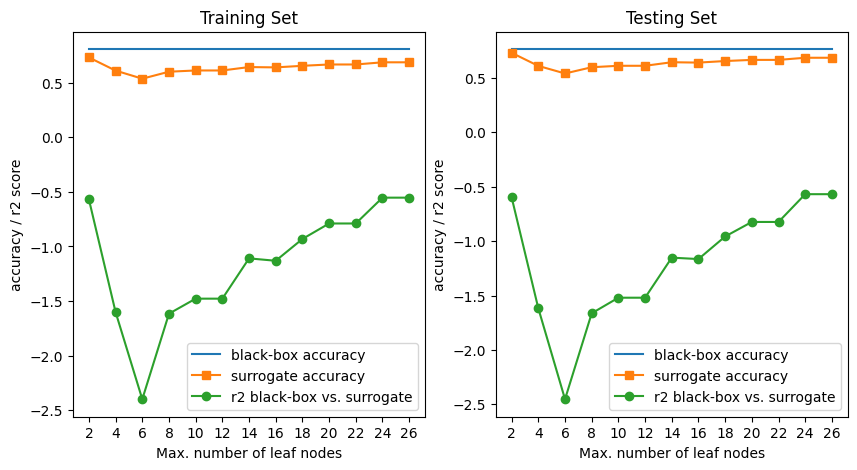

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

fig_labels = ['Training Set', 'Testing Set']
markers = [None, 's', 'o']
for i, dset in enumerate(['trn', 'tst']):
    for j, curve in enumerate(['black-box', 'surrogate', 'r2']):
        z = [acc[mleaf][dset][curve] for mleaf in leaf_limits]
        ax[i].plot(leaf_limits, z, marker=markers[j])
    ax[i].legend(['black-box accuracy', 'surrogate accuracy', 'r2 black-box vs. surrogate'])
    ax[i].set_title(fig_labels[i])
    ax[i].set_xlabel('Max. number of leaf nodes')
    ax[i].set_ylabel('accuracy / r2 score')
    ax[i].set_xticks(leaf_limits)

**Result:** 18 as max. number of leaf nodes seems to be good trade-off between fidelity and complexity for explainability.

In [ ]:
# Class balance:
print(y_train.mean())

0.18658772254430328


In [ ]:
max_leaf_nodes=18

surrogate = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion='gini',
                                   min_samples_leaf=20, class_weight={0: 1, 1: 18})
surrogate.fit(X_train, yb_trn_pred)

DecisionTreeClassifier(class_weight={0: 1, 1: 18}, max_leaf_nodes=18,
                       min_samples_leaf=20)

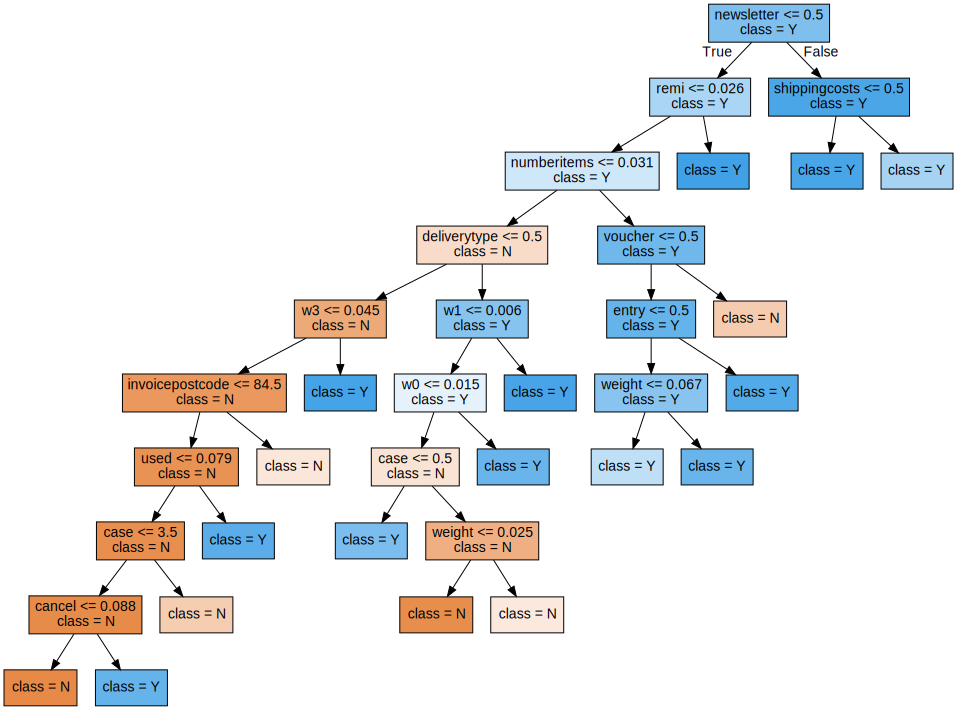

In [ ]:
import graphviz, re
from sklearn import tree

features = X_test.columns.to_numpy()
dot = tree.export_graphviz(surrogate, feature_names=features, # leaves_parallel=True,
                           class_names=['N', 'Y'],
                           filled=True, impurity=False)
dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])', '', dot)
dot = re.sub('(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n', '', dot)
graphviz.Source(dot, format="png")

###**Local Explainability methods**

**Model Agnostic methods**

**LIME**

In [101]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=83838e9a316dba050208ede795e29a70d7a0d35e7d9e3e9494fc659d7fbe9158
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [102]:
cat_features = ['title', 'newsletter', 'deliverytype', 'invoicepostcode', 'voucher',
                'case', 'gift', 'entry', 'points', 'shippingcosts', 'paymenttype',
                'salutation', 'delay', 'model']

cat_idx = np.array([cat_features.index(f) for f in cat_features])

from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=list(X_train.columns),
                                              class_names=['Buy=NO', 'Buy=YES'],
                                              categorical_features=cat_idx,
                                              kernel_width=75.0,
                                              categorical_names=cat_features,
                                              discretize_continuous=False)

In [103]:
# Explain a single instance using example index:
exp = explainer.explain_instance(X_test.iloc[1], gb.predict_proba)
exp.show_in_notebook(show_table=False, show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [104]:
print(len(X_test))

8107


**Shapley Values and TreeSHAP**

In [105]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.9 MB/s eta 0:00:00


In [106]:
import shap
explainer = shap.TreeExplainer(gb, feature_names=list(X_train.columns))
shap_values = explainer(X_test.iloc[13].values.reshape(1, -1))

**Overall average prediction of our model is:**

In [112]:
print(y_pred_gb.mean())

0.13062785247317132


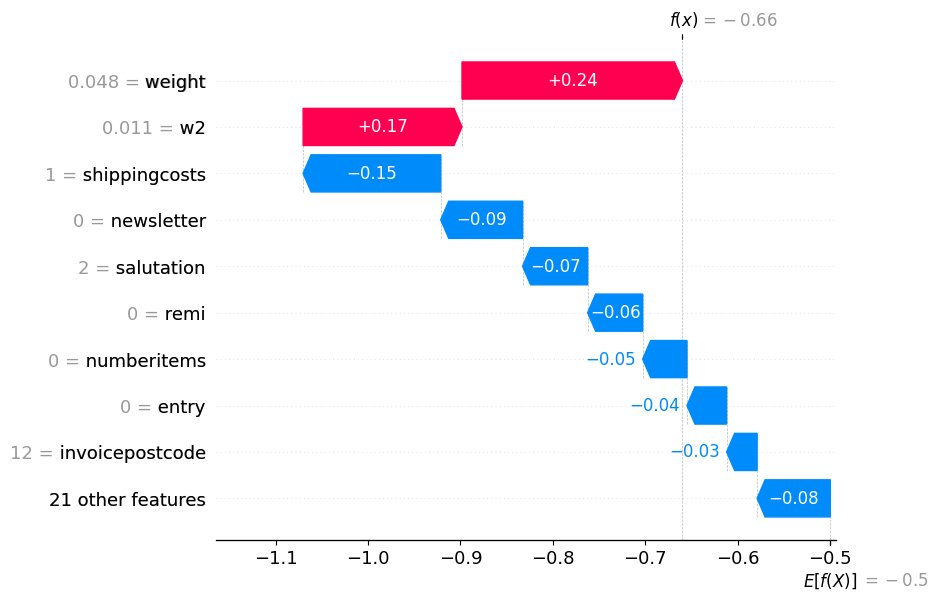

In [107]:
shap.plots.waterfall(shap_values[0])

**Summing up shap-values for all instances in Test-set:**

In [108]:
import shap

explainer = shap.TreeExplainer(gb, feature_names=list(X_train.columns))
shap_values = explainer.shap_values(X_test)

# Summing up SHAP values across instances to get aggregate contributions
aggregate_shap_values = np.abs(shap_values).sum(axis=0)

# Creating a df to better visualize the results
shap_summary_df = pd.DataFrame({'Feature': list(X_train.columns), 'Aggregate_SHAP': aggregate_shap_values})
shap_summary_df = shap_summary_df.sort_values(by='Aggregate_SHAP', ascending=False)

# Displaying summary df
print(shap_summary_df)


            Feature  Aggregate_SHAP
1        newsletter     1046.391933
15           weight      930.852703
3   invoicepostcode      779.848614
9     shippingcosts      671.464415
16             remi      589.526697
4           voucher      547.978787
7             entry      532.737468
5              case      530.868606
14      numberitems      501.349835
20               w1      437.978137
19               w0      405.053995
2      deliverytype      377.311784
24               w5      372.256981
11       salutation      364.904472
10      paymenttype      348.856671
12            model      336.296387
29              w10      250.437135
13            delay      250.167732
21               w2      203.704500
28               w9      163.612008
17           cancel      127.798597
18             used      118.812493
22               w3      109.767538
23               w4       43.269558
26               w7       37.331206
25               w6       33.719982
0             title        9

**Plot overall shapley values:**

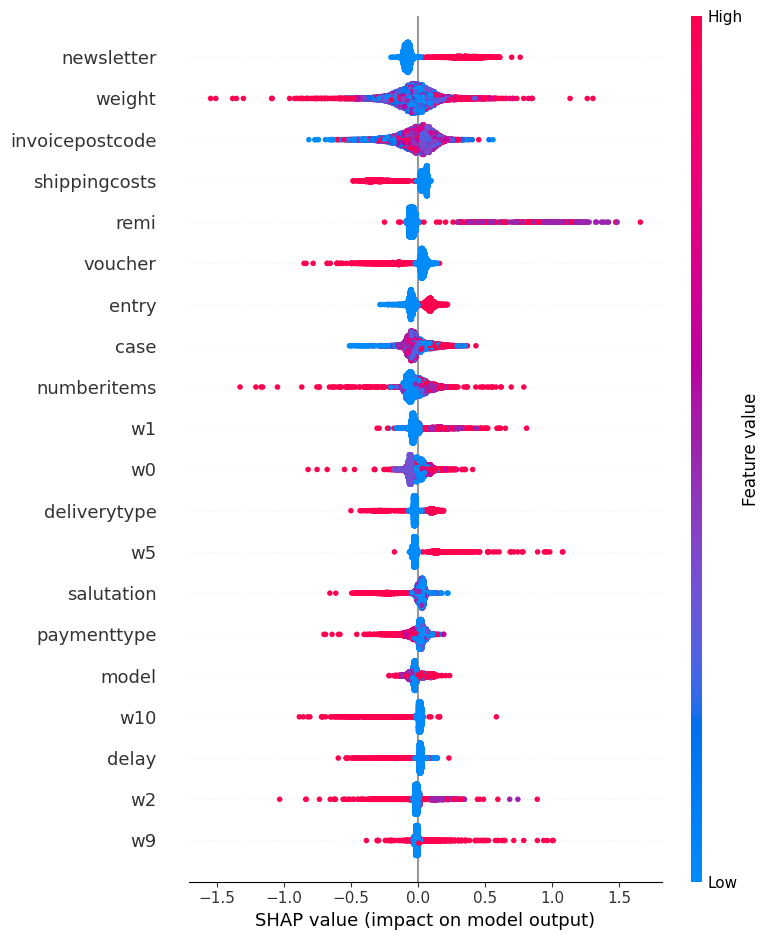

In [109]:
shap.summary_plot(shap_values, X_test)


#**Model Evaluation**

In [ ]:
# Adjusted function, more flexible:
import numpy as np
import pandas as pd

def evaluate_model(y_true, y_pred):
    # Convert to NumPy arrays if input is a pandas Series
    if isinstance(y_true, pd.Series):
        y_true = y_true.values

    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

    # Convert to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    # Calculate F1-score
    f1_score = 2*TP / (2*TP + FP + FN)


    # Compare to distribution of the target variable in test set:
    print('Ground truth in test set: \n')
    print('Number of purchases after initial purchase:', y_true.sum())
    # Share:
    print('Share:', y_true.mean())
    print('Number of those who did not purchase again:', len(y_true) - y_true.sum(),'\n')

    # Print results
    print('Model performance: \n')
    print("Accuracy:", accuracy)
    print("Precision (Share of positives correctly specified among all predicted positives):", precision)
    print("Sensitivity (Share of actual true positive values found):", sensitivity)
    print("Specificity (Share of actual true negative values found):", specificity)
    print("F1-score (Harmonic mean of precision and sensitivity)", f1_score)
    print(f"TP: {TP}", f"FP: {FP}", f"TN: {TN}", f"FN: {FN}")
    return TP, TN, FP, FN


In [ ]:
def all_voucher_expected_revenue(y_true):
  total_customers = len(y_true)
  # Sum of positive class (repeating buyers):
  rep_buyers = y_true.sum()

  non_buyers = total_customers - rep_buyers

  expected_revenue = non_buyers * 1.5 - rep_buyers * 5 # revenue gain - loss
  print(f"Expected revenue if all customers were sent a voucher: €{expected_revenue}")



In [ ]:
def model_expected_revenue(tn, fn):
  rev_gain = tn * 1.5
  rev_loss = fn * 5 # + fp * 1.5, not integrated bc stated, if not sent, no impact on rev.!
  expected_revenue = rev_gain - rev_loss
  print(f"Expected Revenue according to model: €{expected_revenue}")